# Extract camera height (`true_depth`) from longtogeny files to understand how it affects mouse perspectives 

In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from aging.organization.paths import FOLDERS
from aging.plotting import figure
from toolz import concat, valfilter, tail, take, keyfilter
from toolz.curried import get

In [2]:
def extract_true_depth(path):
    try:
        with h5py.File(path, 'r') as f:
            return f["metadata/extraction/true_depth"][()]
    except Exception:
        return None

In [3]:
exclude_df = pd.read_csv('/n/groups/datta/win/longtogeny/data/metadata/Ontogeny experiment list - Session quality control.csv')

In [4]:
true_depth = {pth: extract_true_depth(pth) for pth in tqdm(concat(f.glob('**/results_00.h5') for f in FOLDERS[:4]))}
true_depth = valfilter(lambda v: v is not None, true_depth)

0it [00:00, ?it/s]

In [5]:
true_depth = keyfilter(
    lambda k: not (exclude_df["File path"] == str(k)).any(), true_depth
)

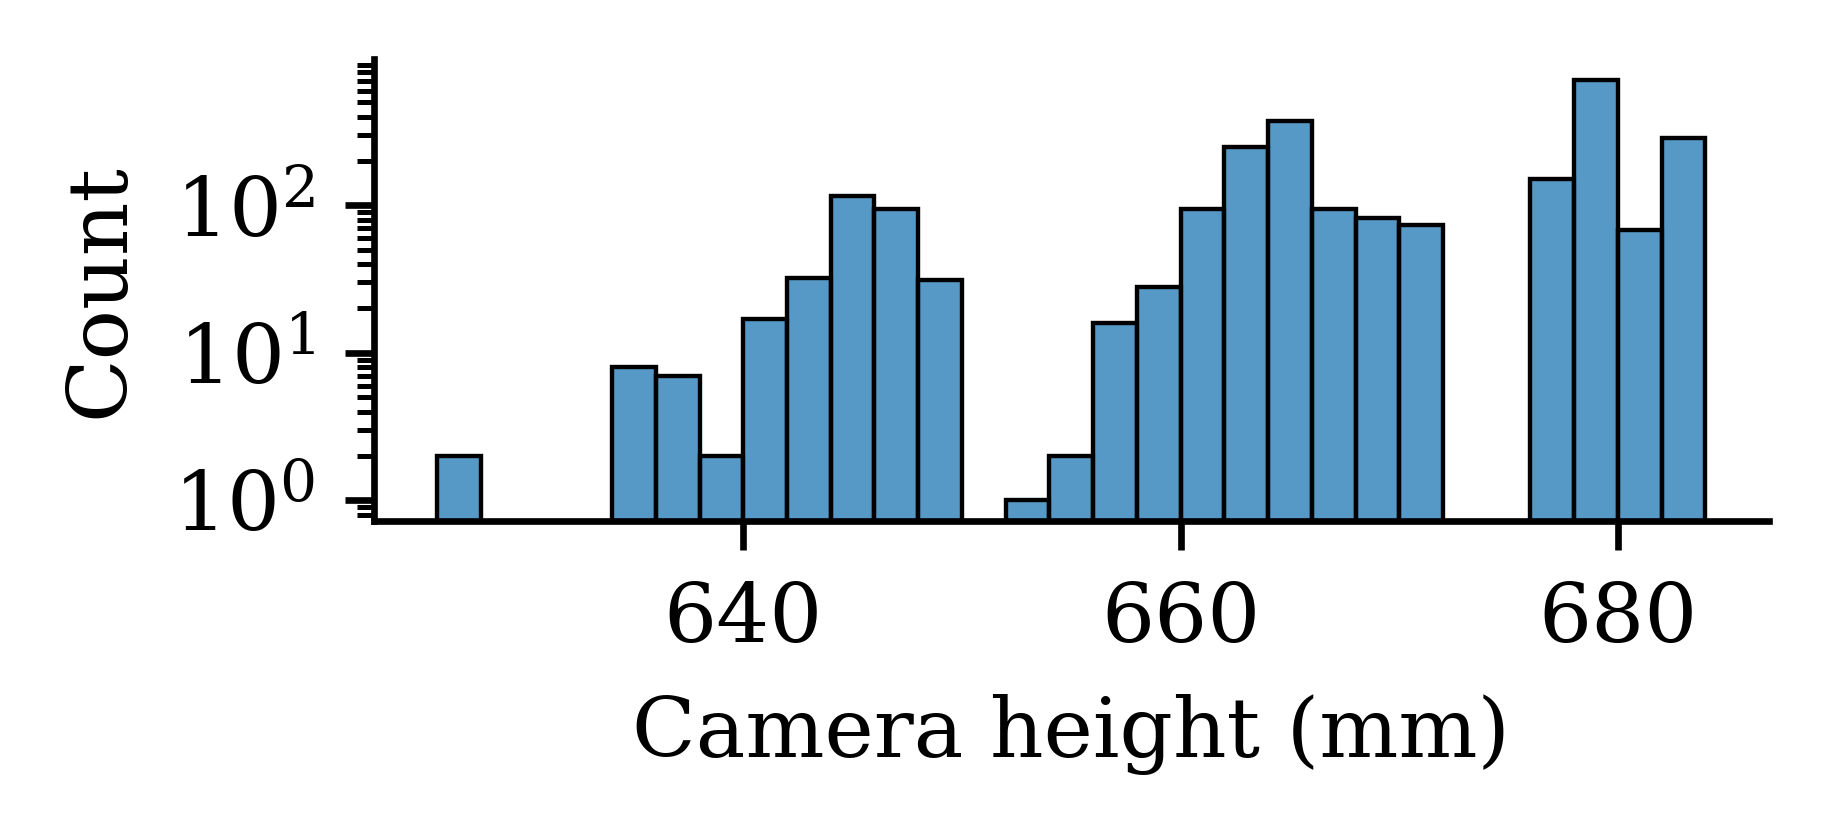

In [11]:
figure(3, 1)
ax = sns.histplot(list(true_depth.values()), binwidth=2)
ax.set(xlabel='Camera height (mm)', yscale='log')
sns.despine()

In [38]:
true_depth = valfilter(lambda v: v > 400, true_depth)

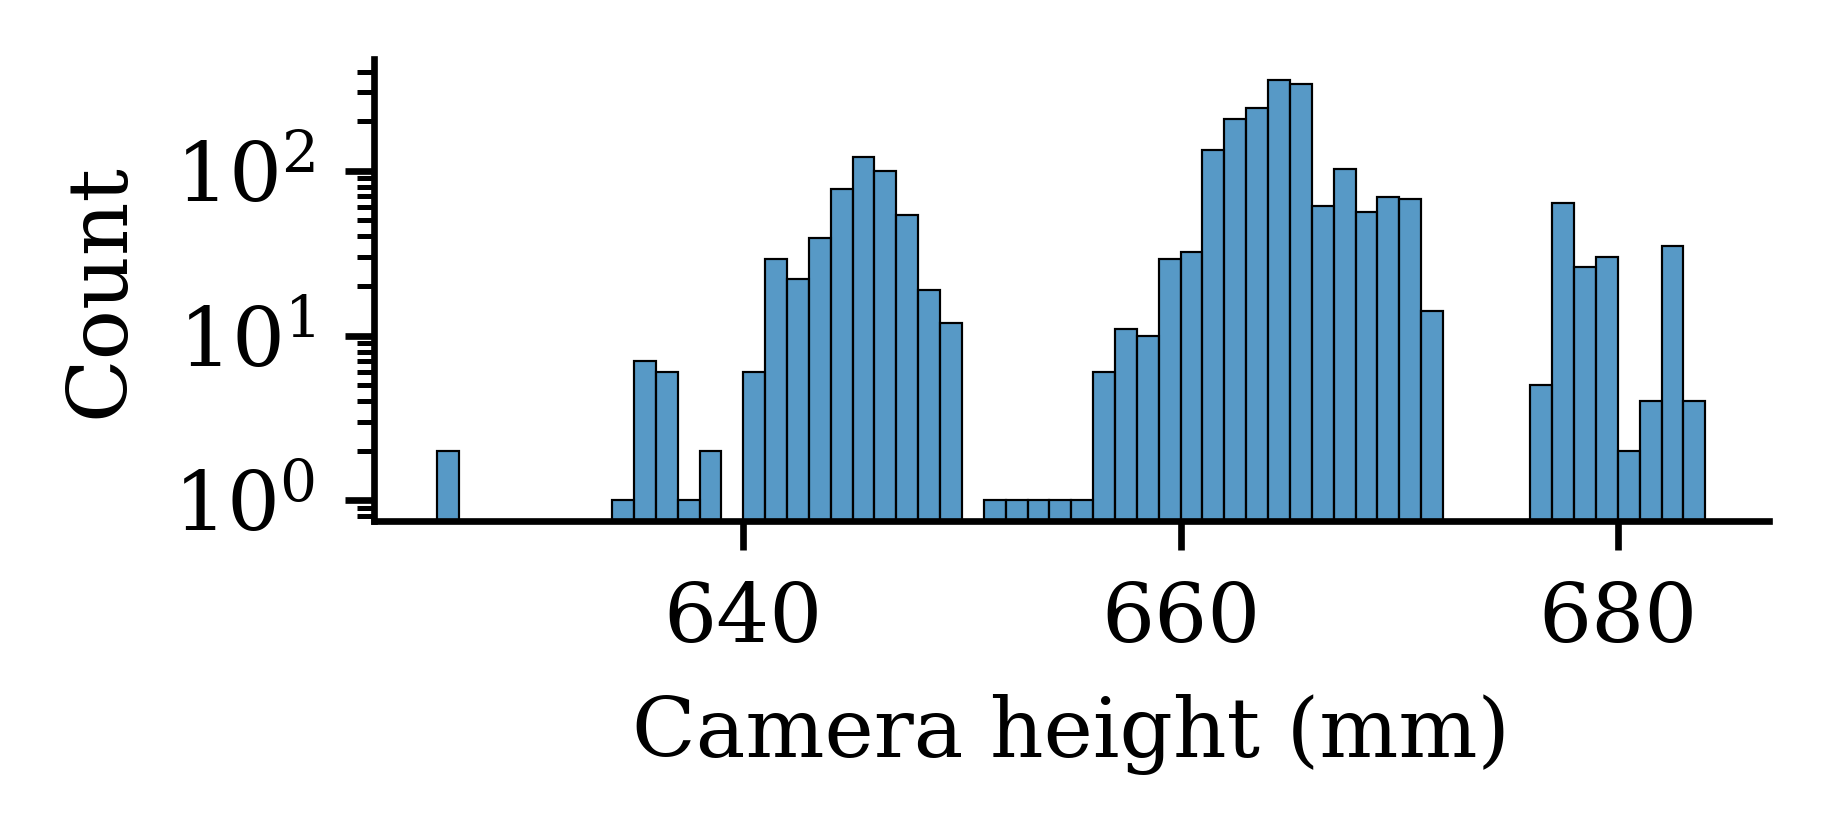

In [39]:
figure(3, 1)
ax = sns.histplot(list(true_depth.values()), binwidth=1)
ax.set(xlabel='Camera height (mm)', yscale='log')
sns.despine()

In [40]:
true_depth = dict(sorted(true_depth.items(), key=get(1)))

In [41]:
with h5py.File(list(true_depth)[2], 'r') as h5f:
    bg = h5f['metadata/extraction/background'][()]
    roi = h5f['metadata/extraction/roi'][()]

In [47]:
list(true_depth)[2]

PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Males/20210601/session_20210601145533/proc/results_00.h5')

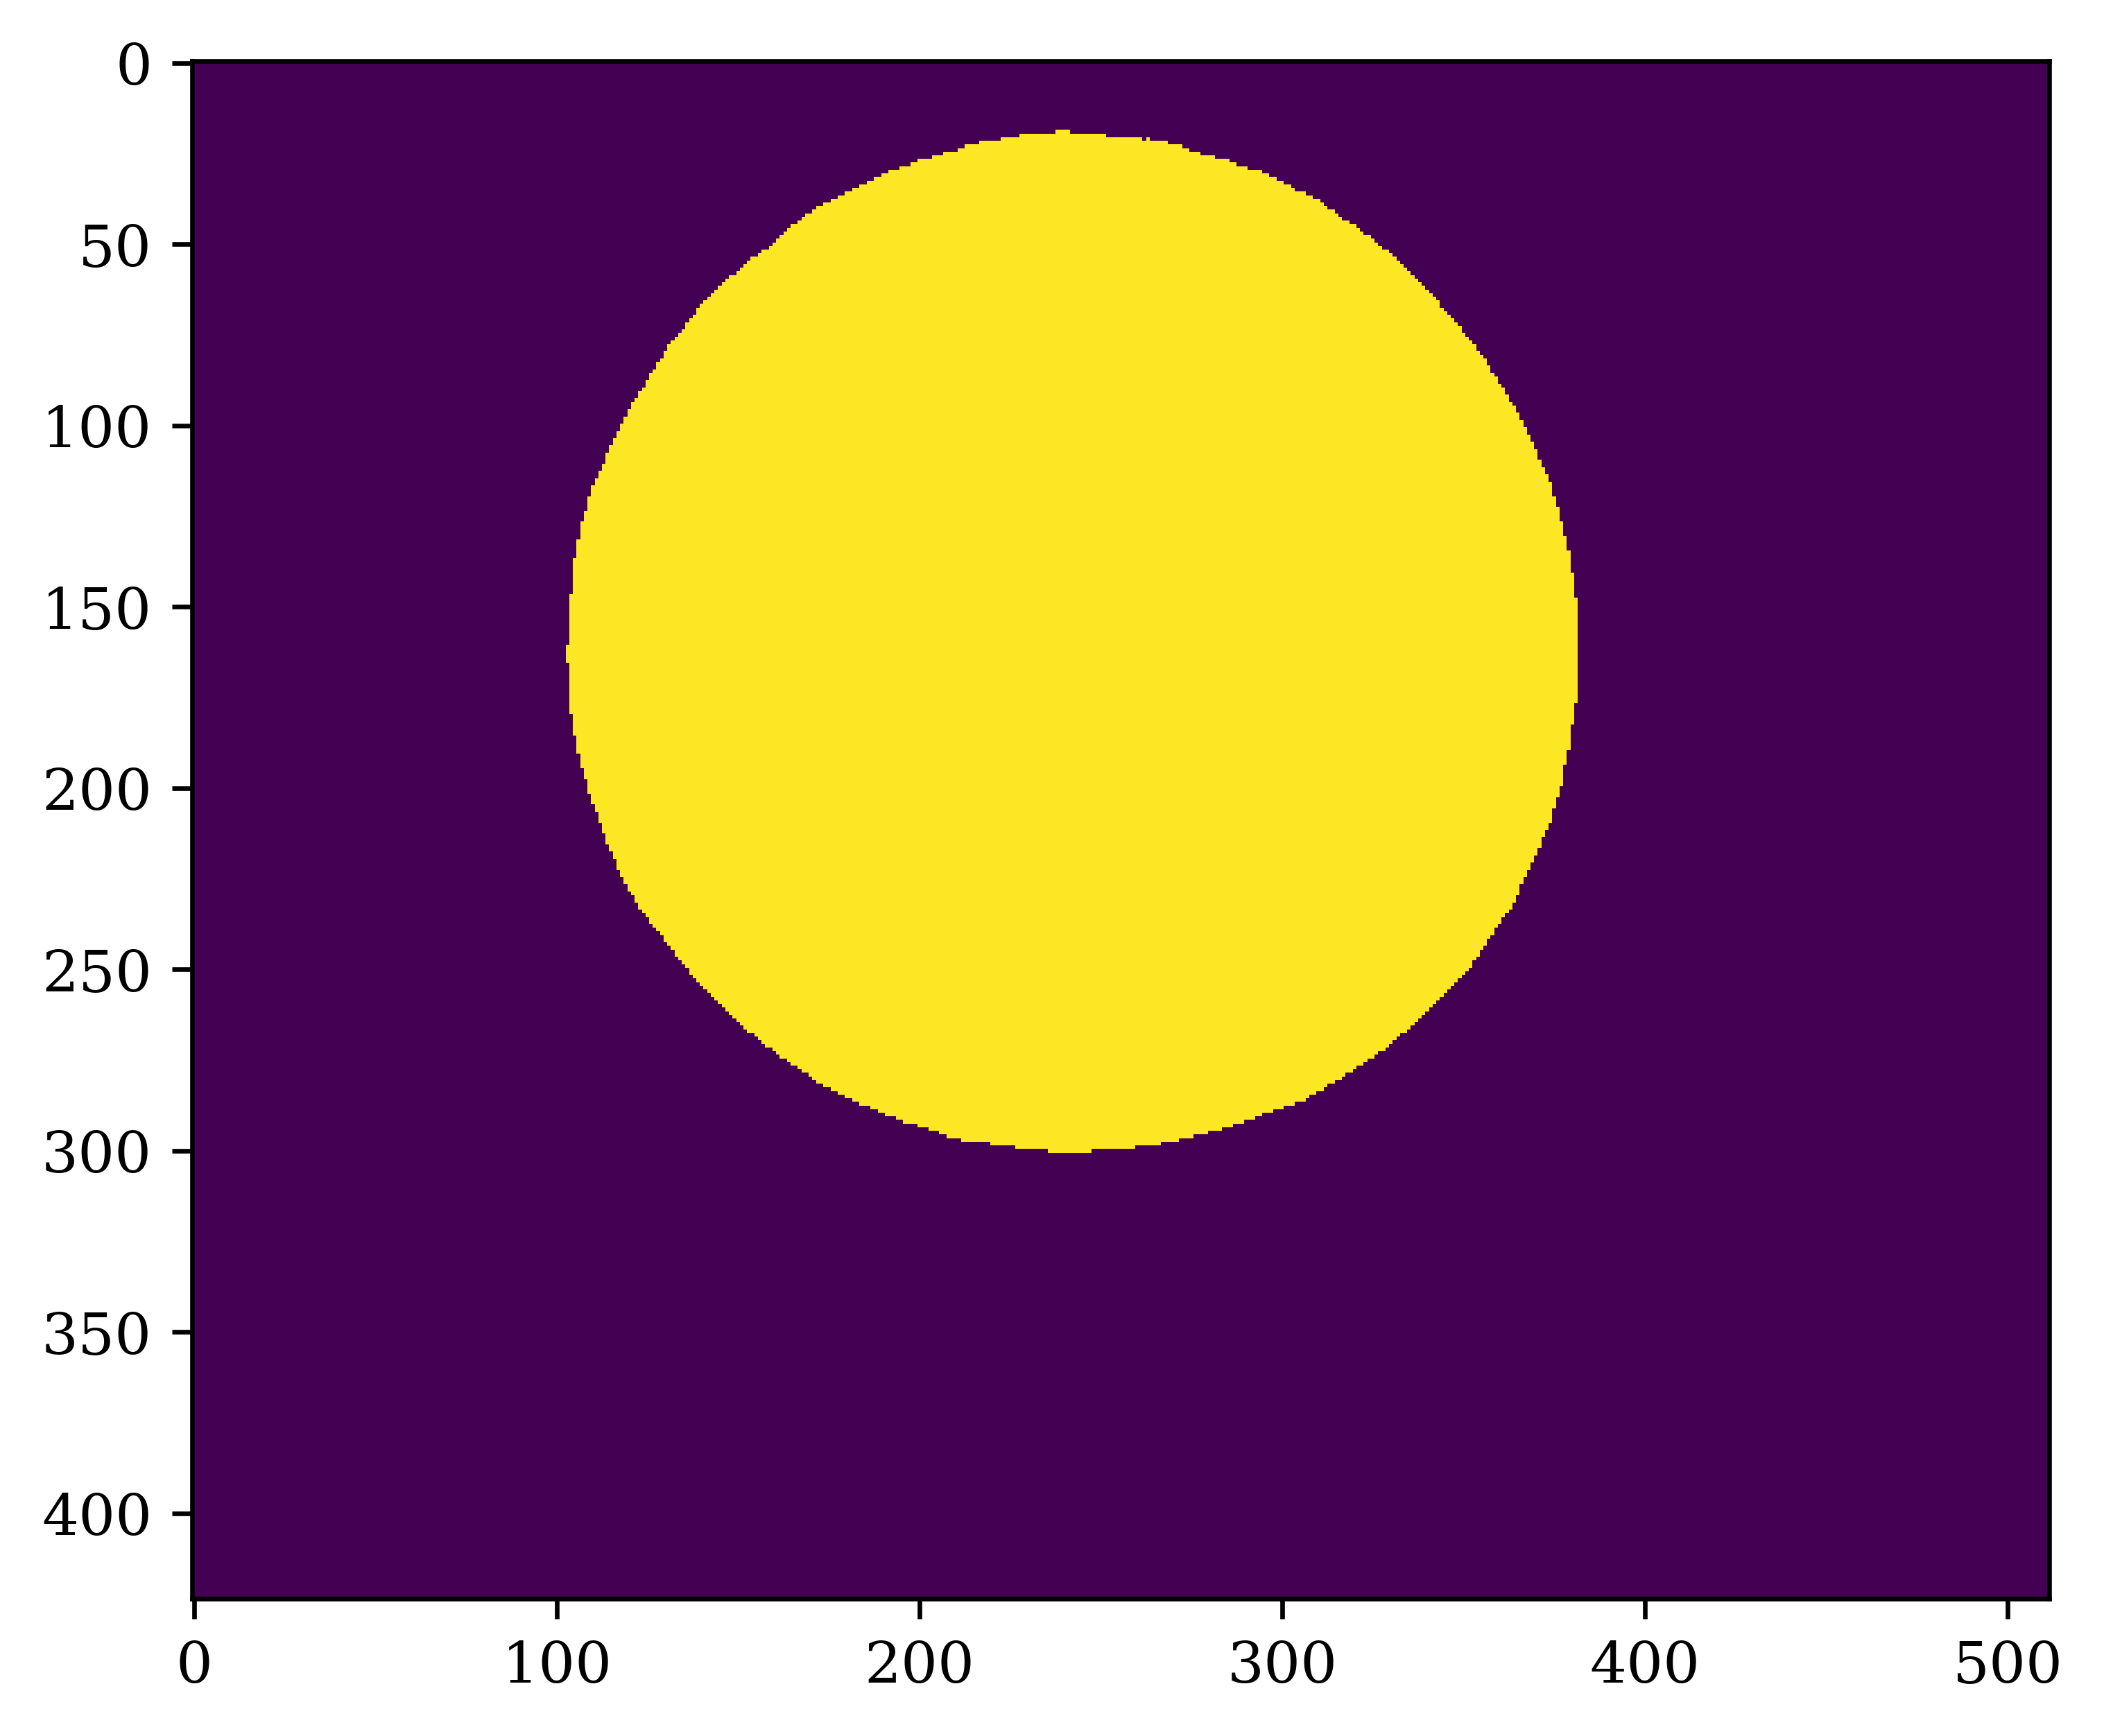

In [48]:
plt.imshow(roi)

In [35]:
bg.shape

(424, 512)

In [25]:
dict(take(10, true_depth.items()))

{PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Females/session_20211023160717/proc/results_00.h5'): 539.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Females/session_20211023154112/proc/results_00.h5'): 570.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Males/session_20220226180049/proc/results_00.h5'): 570.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Females/session_20211023151402/proc/results_00.h5'): 594.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Males/20211107/session_20211107181006/proc/results_00.h5'): 616.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Females/session_20220306110744/proc/results_00.h5'): 622.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Females/session_20211023141300/proc/results_00.h5'): 622.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Males/2

In [26]:
dict(tail(10, true_depth.items()))

{PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Males/session_20230618115641/proc/results_00.h5'): 682.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Males/session_20230618131653/proc/results_00.h5'): 682.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Males/session_20230520125249/proc/results_00.h5'): 682.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Males/session_20230520113147/proc/results_00.h5'): 682.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Males/session_20230601111107/proc/results_00.h5'): 682.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/Ontogeny_females/session_20230721082719/proc/results_00.h5'): 683.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/Ontogeny_females/session_20230721094942/proc/results_00.h5'): 683.0,
 PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/Ontogeny_females/session_20230721091042/proc/results_00.h5'): 68